In [54]:
import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'


In [56]:
#!wget $data 

In [57]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [58]:
df.columns = df.columns.str.lower().str.replace(' ', '_' )


In [59]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [60]:
df.describe().round(2)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.00,9222.00,8996.00,9704.00,8774.00,9704.00,9202.00,9704.00
mean,199.71,3.96,149.66,3001.28,15.02,2011.48,-0.01,14.99
std,49.46,2.00,29.88,497.89,2.51,6.66,1.05,2.56
min,10.00,0.00,37.00,952.68,6.00,2000.00,-4.00,6.20
25%,170.00,3.00,130.00,2666.25,13.30,2006.00,-1.00,13.27
50%,200.00,4.00,149.00,2993.23,15.00,2012.00,0.00,15.01
75%,230.00,5.00,170.00,3334.96,16.70,2017.00,1.00,16.71
max,380.00,13.00,271.00,4739.08,24.30,2023.00,4.00,25.97


## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

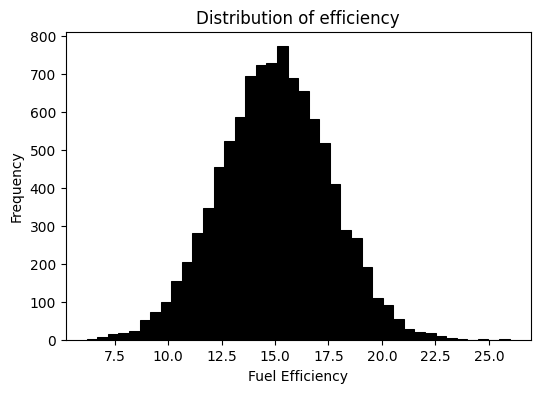

In [61]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency')
plt.title('Distribution of efficiency')

plt.show()

**No Long Tail**

In [62]:
columns_to_use = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

df = df[columns_to_use]

## Question 1
There's one column with missing values. What is it?

In [63]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [64]:
df.describe().round(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.00,8996.00,9704.00,9704.00,9704.00
mean,199.71,149.66,3001.28,2011.48,14.99
std,49.46,29.88,497.89,6.66,2.56
min,10.00,37.00,952.68,2000.00,6.20
25%,170.00,130.00,2666.25,2006.00,13.27
50%,200.00,149.00,2993.23,2012.00,15.01
75%,230.00,170.00,3334.96,2017.00,16.71
max,380.00,271.00,4739.08,2023.00,25.97


## Prepare and split the dataset
- Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [65]:
np.random.seed(42)

n = len(df)


n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [66]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Question 3

1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)
7. Which option gives better RMSE?

In [67]:
df_train.iloc[10]

engine_displacement     240.000000
horsepower              159.000000
vehicle_weight         2916.987921
model_year             2001.000000
Name: 10, dtype: float64

In [68]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [69]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [70]:
def prepare_X(df, fill_na):
    df_num = df
    df_num = df_num.fillna(fill_na)
    X = df_num.values
    return X

In [71]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [72]:
X_train = prepare_X(df_train,0)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

round(rmse(y_train, y_pred),2)

np.float64(0.04)

In [73]:
X_train = prepare_X(df_train,df_train['horsepower'].mean())
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

round(rmse(y_train, y_pred),2)

np.float64(0.04)

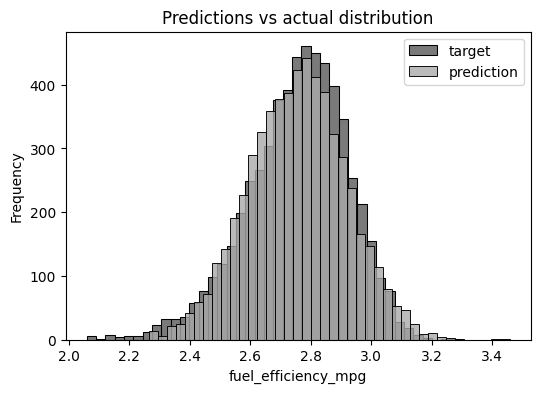

In [74]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [75]:
X_val = prepare_X(df_val,0)
y_pred = w_0 + X_val.dot(w)

In [76]:
rmse(y_val, y_pred)

np.float64(0.04497119647380536)

## Regularization

In [77]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [78]:
def prepare_X(df_req):
    df_num = df_req.copy()
    return df_num.fillna(0).values

In [79]:
for r in [0, 0.01, 0.1, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.04497119647380536
  0.01 0.04496610070249742
   0.1 0.04542695888296354
     1 0.04617559872855367
    10 0.04632958133888761
   100 0.04634625360929043


In [80]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.039086325392652485
val 0.039979257825777034


In [81]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.039120822415064364
val 0.039977872016356164


In [82]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.0399792537194885
0.0001 0.039978852846515124
 0.001 0.039975661144883635
  0.01 0.039977872016356164
   0.1 0.04050873984547382
     1 0.041353851508238566
     5 0.041506118232732744
    10 0.04152680123751592


In [83]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.039977872016356164
test: 0.03788071229061193
